## STAT 517 PROJECT 1 - SUPERVISED LEARNING - CLASSIFICATION
## NAME : VIGNESH J MURALIDHARAN

### DATASET 2 - QUESTION 2 
##### Adult Data Set which contains income data for people. We will look at the data and build some machine learning model which tries to predict if a person will make more than 50K a year. Model selection and analysis for regression and classification tasks often grows into a complex task. This paper explores the use of basic linear methods and their efficacy on the Adult Census Dataset. The objective was classification of whether income would exceed 50k/yr. 6 different models were compared: (1) Logistic Regression, (2) K Nearest Neighbors, (3) SVC, (4) Random forest, (5) Decision Tree, (6) Naive Bayes & (7) Neural Networks. Let’s first import some libraries that we are going to need for our analysis

In [13]:
import pandas as pd ; import numpy as np; import random as rnd ;import math
#importing data visualization packages
import seaborn as sns ; import matplotlib.pyplot as plt
%matplotlib inline
#importing machine learning packages
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import Imputer
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from IPython.display import display, Math, Latex
import os; import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### 1 . DATA VISUALIZATION
####  It is important to determine if an individual has a salary greater than or less than 50,000 annually based on the statistics provided. This challenged is known a classification fit, as our response variable is categorical in nature (binary). Classification is different in nature from regression problems in the sense that there is no particular ordering to the answers. Though it is entirely possible to encode the categories into numbers and train based on that system, a numbered category set would imply a sense of order to the answers. Initially, the data must be obtained, observed, and processed to extract useful features and present it to the models. The first segment will focus on exploring the data and beginning some understanding of the trends and representations that are present. Following this, we will handle missing or poorly formed fields through preprocessing. Finally, five separate models will be developed and their performance observed. Actual Dataset involves both categorical and continious variables

In [2]:
adult = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/adult.csv")
adult.head(3)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


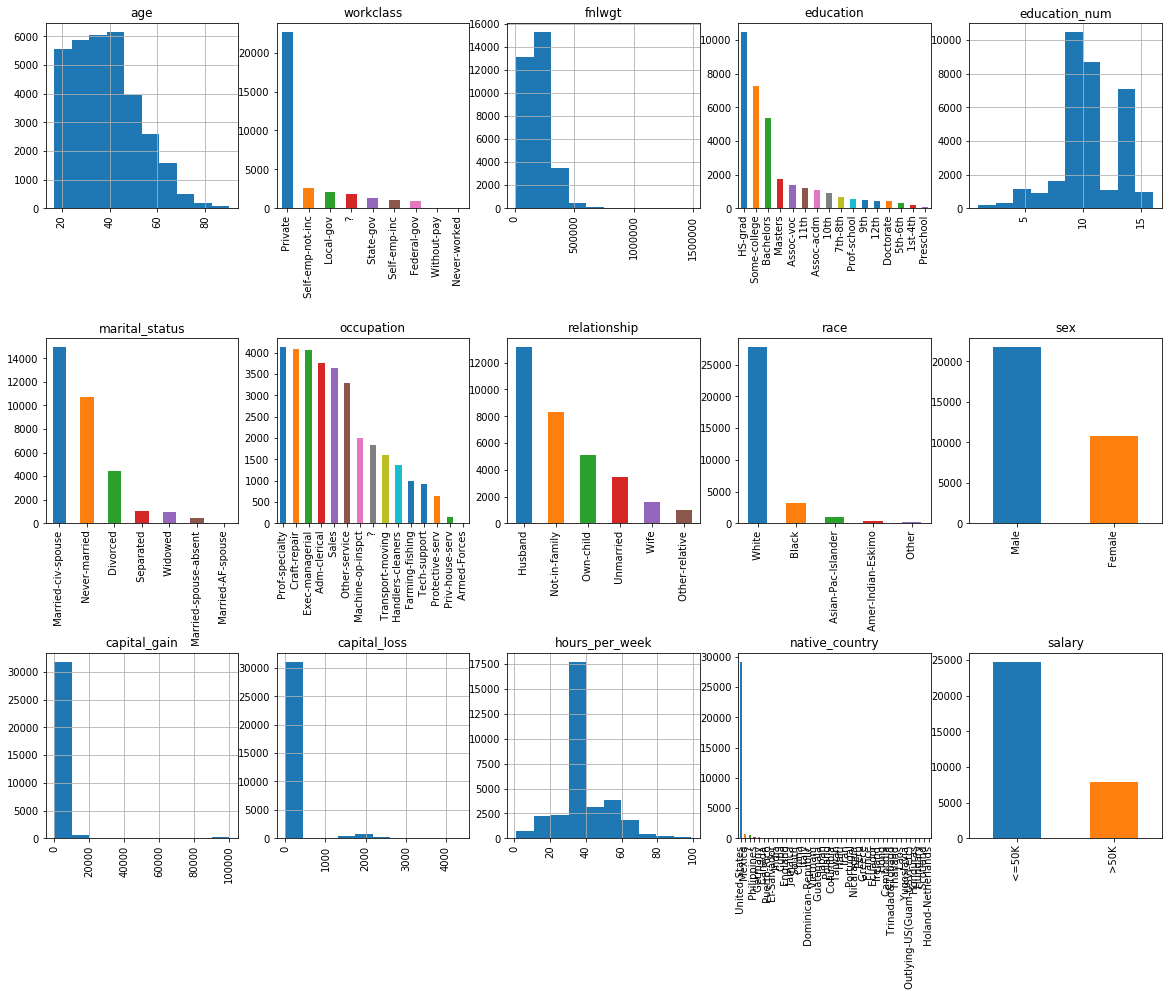

In [3]:
fig = plt.figure(figsize=(20,15))
cols = 5 ;rows = math.ceil(float(adult.shape[1]) / cols)
for i, column in enumerate(adult.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if adult.dtypes[column] == np.object:
        adult[column].value_counts().plot(kind="bar", axes=ax)
    else:
        adult[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

#### Here from the plots above the data is mostly concentrated in the USA with mostly male white people. The amount of male in this census is more compared to female but at the same time if we check the marital status the Married civ-spouse is more which means most of them have been as Husband and having atleast High school studies which is good. Intrestinglly we can see that people who work for private companies are more than the other type of companies and in that occupation more being as a prof - speciality in private colleges i hope. There are very less people who earn more than 10000. Having less capital loss is good, some people having a little of capital loss may be due to doing business 

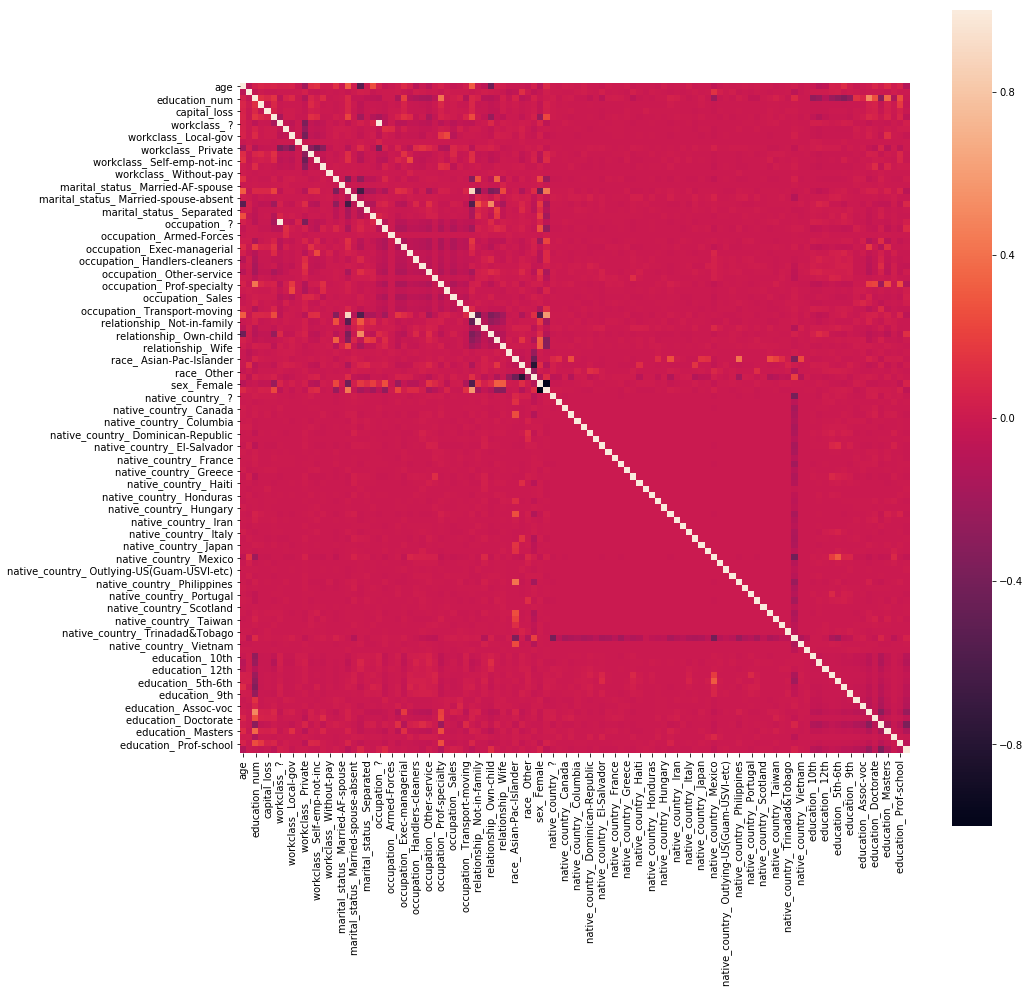

In [4]:
data = adult
X_continuous = data[['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']]
X_dummies = pd.get_dummies(data[['workclass','marital_status','occupation', 'relationship','race','sex','native_country','education']]) 
X = pd.concat([X_continuous,X_dummies],axis=1)
# create correlations plot
plt.subplots(figsize=(15,15)) ;sns.heatmap(X.corr(),square=True)

### 2. CLEANED DATA - PREPROCESSED - FROM DR LEE

In [5]:
adultclean = pd.read_csv("https://raw.githubusercontent.com/sauchilee/Stat517/master/Data/adult_preprocessed.csv")
adultclean.head(3)

,age,workclass=Federal-gov,workclass=Local-gov,workclass=Never-worked,workclass=Self-emp-inc,workclass=Self-emp-not-inc,workclass=State-gov,workclass=Without-pay,fnlwgt,education=10th,...,native_country=Portugal,native_country=Puerto-Rico,native_country=Scotland,native_country=South,native_country=Taiwan,native_country=Thailand,native_country=Trinadad&Tobago,native_country=Vietnam,native_country=Yugoslavia,salary
0,39,0,0,0,0,0,1,0,77516,0,...,0,0,0,0,0,0,0,0,0,<=50K
1,50,0,0,0,0,1,0,0,83311,0,...,0,0,0,0,0,0,0,0,0,<=50K
2,38,0,0,0,0,0,0,0,215646,0,...,0,0,0,0,0,0,0,0,0,<=50K


In [6]:
adultclean["salary"]=adultclean["salary"].astype('category') # Changing "Y"-Salary from Object type to Category type
adultclean["salary_category"]=adultclean["salary"].cat.codes # Assigned encoders adding new columns
adultclean=adultclean.select_dtypes(include=['uint8','int64','int8']).copy() # Here i drop the object type to add int and uint type

##### 2.1 CHECKING DIMETION AND TRAIN TEST SPLIT OF THE CLEANED DATA / PREPROCESSED DATA

In [7]:
y_adultclean = pd.DataFrame([adultclean.salary_category]).T # TAKING THE SALARY AS THE Y VARIABLE OR TARGET
x_adultclean = pd.DataFrame(adultclean) # CONSIDERING ALL THE VARIABLES TO AS X VARIABLES AT FIRST
x_adultclean = adultclean.drop(['salary_category'], axis = 1) # DROPPING THE SALARY FROM THE X VARIABLES
print (x_adultclean.shape) ; print (y_adultclean.shape) # PRINTING THE DIMENTION OF THE BOTH LEFTOVER "Y" & "X" VARIABLES
from sklearn.cross_validation import train_test_split # TRAINING AND TEST SPLIT CROSS VALIDATAION
xtrain_adultclean, xtest_adultclean, ytrain_adultclean, ytest_adultclean = train_test_split( 
    x_adultclean, y_adultclean, random_state = 1, test_size = 0.25) # THE TRAIN AND TEST SPLIT IS 75% AND 25 %
print (xtrain_adultclean.shape) ; print (xtest_adultclean.shape) # PRINTING ALL THE X_TRAIN, X_TEST
print (ytrain_adultclean.shape) ; print (ytest_adultclean.shape) # PRINTING ALL THE Y_TRAIN, Y_TEST

(32561, 97)
(32561, 1)
(24420, 97)
(8141, 97)
(24420, 1)
(8141, 1)


### 3. CHECKING WITH DIFFERENT MODELS 
#### 3.1 - GAUSSIAN NAIVE BAYES - The Naive Bayes classiﬁer assumes that the joint probability density function is the product of the marginal probability density function for each xi. This presumes that the probability density function of each class is independent from each other. 
$Posterior=((Likelihood)*(Proposition prior probability)) / Evidence prior probability$
$P(xj | Ci) = 1/(\surd 2*pi*sigma^2 *ci) *exp(-(xj-\mu*cj)^2/2\sigma^2*ci) $

In [14]:
model = GaussianNB()
model.fit(xtrain_adultclean, ytrain_adultclean) # MODEL FIT FOR GAUSSIAN
ymodel_GN = model.predict(xtest_adultclean)
acc_gauss1 = round(model.score(xtrain_adultclean, ytrain_adultclean) * 100, 2) # ROUNDING THE ACCURACY SCORE
print ('Training accuracy = {}'.format(acc_gauss1))# PRINTING THE TRAINING SCORE
acc_gauss = round(accuracy_score(ytest_adultclean, ymodel_GN) * 100, 2)# ROUNDING THE ACCURACY SCORE
print ('Testing accuracy = {}'.format(acc_gauss)) # PRINTING THE TESTING SCORE
roc_auc_score(ytest_adultclean, ymodel_GN)

Training accuracy = 79.2
Testing accuracy = 80.28


0.6250505182861089

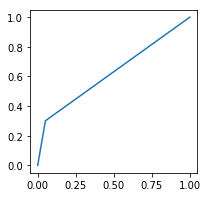

In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1 = le.fit_transform(ytest_adultclean)
y2 = le.fit_transform(ymodel_GN)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)

#### 3.2 - K NEAREST NEIGHBORS - K Nearest Neighbors (KNN) is a radically diﬀerent approach than those used previously.  To make a prediction for X = x KNN uses training observations and identiﬁes those closes to x. X is then attributed to the class that is the most prominant amongst the neighbors. This results in a non-parametric approach and no assumptions are made regarding the decision boundary. It is expected for KNN to perform well in situations where the decision boundary is highly non-linear. However, as QDA has already been bested by LDA, this implies a strong possibility for the decision boundary to be close to linear. The major determining factor for the prediction in KNN is the number of nearest neighbors of a similar class. However, it wouldn’t make any sense to include the entire dataset which would just provide the baseline estimation. Instead, KNN is about ﬁnding a local approximation in the multivariate space. This requires knowing how many nearby training points to take into account as well as ensuring the training set is normalized. 

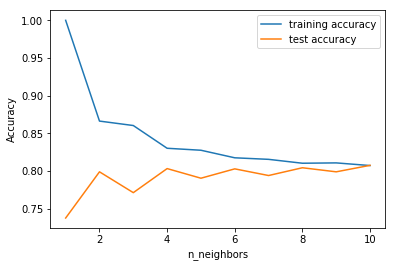

In [16]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 11
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(xtrain_adultclean, ytrain_adultclean)
    # record training set accuracy
    training_accuracy.append(clf.score(xtrain_adultclean, ytrain_adultclean))
    # record generalization accuracy
    test_accuracy.append(clf.score(xtest_adultclean, ytest_adultclean))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

###### By seeing the graph above for the range we can see that mostly we can go by odd numbers for the n_neighbours by having k=1,7,11

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 1) # TESTING FOR K=1 NEIGHBORS
model.fit(xtrain_adultclean, ytrain_adultclean)
ymodel_k1 = model.predict(xtest_adultclean)
acc_knn1 = round(model.score(xtrain_adultclean, ytrain_adultclean) * 100, 2)
print ('Training accuracy K=1 = {}'.format(acc_knn1))
acc_knn = round(accuracy_score(ytest_adultclean, ymodel_k1) * 100, 2)
print ('Testing accuracy K=1= {}'.format(acc_knn))
RocScore=roc_auc_score(ytest_adultclean, ymodel_k1) ; RocScore# ROC SCORE FOR K=1 NEIGHBOUR

Training accuracy K=1 = 100.0
Testing accuracy K=1= 73.76


0.6492191051224031

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 7) # TESTING FOR K=7 NEIGHBORS
model.fit(xtrain_adultclean, ytrain_adultclean)
ymodel_k7 = model.predict(xtest_adultclean)
acc_knn1 = round(model.score(xtrain_adultclean, ytrain_adultclean) * 100, 2)
print ('Training accuracy K=7 = {}'.format(acc_knn1))
acc_knn = round(accuracy_score(ytest_adultclean, ymodel_k7) * 100, 2)
print ('Testing accuracy K=7= {}'.format(acc_knn))
RocScore=roc_auc_score(ytest_adultclean, ymodel_k7) ; RocScore# ROC SCORE FOR K=7 NEIGHBOUR

Training accuracy K=7 = 81.55
Testing accuracy K=7= 79.4


0.6150993870131449

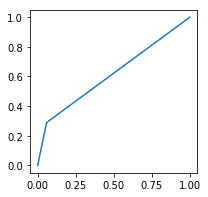

In [19]:
le = preprocessing.LabelEncoder() ; y2 = le.fit_transform(ymodel_k7)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 11) # TESTING FOR K=1 NEIGHBORS
model.fit(xtrain_adultclean, ytrain_adultclean)
ymodel_k11 = model.predict(xtest_adultclean)
acc_knn1 = round(model.score(xtrain_adultclean, ytrain_adultclean) * 100, 2)
print ('Training accuracy K=11 = {}'.format(acc_knn1))
acc_knn = round(accuracy_score(ytest_adultclean, ymodel_k11) * 100, 2)
print ('Testing accuracy K=11= {}'.format(acc_knn))
RocScore=roc_auc_score(ytest_adultclean, ymodel_k11) ; RocScore# ROC SCORE FOR K=11 NEIGHBOUR

Training accuracy K=11 = 80.86
Testing accuracy K=11= 80.52


0.6105630132429123

##### HERE IT SEEMS LIKE THE TESTING SCORES ARE INCREASING AS WE INCREASE THE K NEIGHBORS BUT THE ROC SCORE DERECREAS THIS CAN BE BECAUSE OF THE RANGE OF SEE SET EARLIER .
#### 3.3 - LOGISTIC REGRESSION - Logistic Regression Assumptions (1) Binary logistic regression requires the dependent variable to be binary (2) For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome (3) Only the meaningful variables should be included (4) The independent variables should be independent of each other. That is, the model should have little or no multicollinearity (5) The independent variables are linearly related to the log odds (6) Logistic regression requires quite large sample sizes. 
$p(X)=e^{\beta0+\beta1X}/1+e^{\beta0+\beta1X}$

In [21]:
logreg = LogisticRegression()
logreg.fit(xtrain_adultclean, ytrain_adultclean)
y_pred_log = logreg.predict(xtest_adultclean)
acc_log1 = round(logreg.score(xtrain_adultclean, ytrain_adultclean) * 100, 2)
print ('Training accuracy = {}'.format(acc_log1))
acc_log = round(accuracy_score(ytest_adultclean, y_pred_log) * 100, 2)
print ('Testing accuracy = {}'.format(acc_log))
roc_auc_score(ytest_adultclean, y_pred_log)

Training accuracy = 79.31
Testing accuracy = 80.63


0.6116623740150338

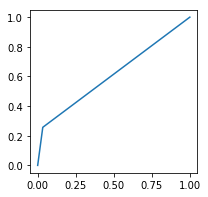

In [22]:
le = preprocessing.LabelEncoder() ;y2 = le.fit_transform(y_pred_log)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)

In [23]:
logreg100 = LogisticRegression(C=100).fit(xtrain_adultclean, ytrain_adultclean)
y_model_log = logreg.predict(xtest_adultclean)
print("Training set score: {:.3f}".format(logreg100.score(xtrain_adultclean, ytrain_adultclean)))
print("Test set score: {:.3f}".format(logreg100.score(xtest_adultclean, ytest_adultclean)))
roc_auc_score(ytest_adultclean, y_model_log)

Training set score: 0.793
Test set score: 0.806


0.6116623740150338

In [24]:
logreg001 = LogisticRegression(C=0.01).fit(xtrain_adultclean, ytrain_adultclean)
print("Training set score: {:.3f}".format(logreg001.score(xtrain_adultclean, ytrain_adultclean)))
print("Test set score: {:.3f}".format(logreg001.score(xtest_adultclean, ytest_adultclean)))
roc_auc_score(ytest_adultclean, y_model_log)

Training set score: 0.793
Test set score: 0.806


0.6116623740150338

#### 3.4 - SUPPORT VECTOR MACHINE - Is an extension of the support vector classifier that results from enlarging the feature space in a specific way using kernals. The linear support vector classifier can be represented as 
$f(X) = (\beta)0 +\Sigma \alpha(x,xi)$ 
Where n parameters $\alpha i$  i=1,2,3...n are per training observations. 

In [25]:
svc = SVC()
svc.fit(xtrain_adultclean, ytrain_adultclean)
y_pred_SVC = svc.predict(xtest_adultclean)
acc_svc1 = round(svc.score(xtrain_adultclean, ytrain_adultclean) * 100, 2)
print ('Training accuracy = {}'.format(acc_svc1))
acc_svc = round(accuracy_score(ytest_adultclean, y_pred_SVC) * 100, 2)
print ('Testing accuracy = {}'.format(acc_svc))
roc_auc_score(ytest_adultclean,y_pred_SVC)

Training accuracy = 96.64
Testing accuracy = 77.29


0.5232158391508128

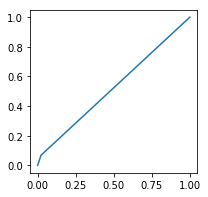

In [26]:
le = preprocessing.LabelEncoder() ; y2 = le.fit_transform(y_pred_SVC)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)

#### 3.5 DECISION TREE - The maximum optimum depth accuracy will be 8 for this example and now with the max depth the training and the test accuracy with the ROC score to be verified. 
#### Max depth controls the maximum depth of the tree that will be created. It can also be described as the length of the longest path from the tree root to a leaf. The root node is considered to have a depth of 0. The Max Depth value cannot exceed 30.

Accuracy on training set: 0.857
Accuracy on test set: 0.857


0.746026686085024

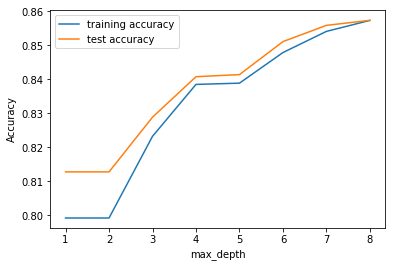

In [27]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 9
max_depth_settings = range(1, 9)
for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(xtrain_adultclean, ytrain_adultclean)
    # record training set accuracy
    training_accuracy.append(clf.score(xtrain_adultclean, ytrain_adultclean))
    # record generalization accuracy
    test_accuracy.append(clf.score(xtest_adultclean, ytest_adultclean))
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(xtrain_adultclean, ytrain_adultclean)
y_model_tree_8 = tree.predict(xtest_adultclean)
print("Accuracy on training set: {:.3f}".format(tree.score(xtrain_adultclean, ytrain_adultclean)))
print("Accuracy on test set: {:.3f}".format(tree.score(xtest_adultclean, ytest_adultclean)))
roc_auc_score(ytest_adultclean,y_model_tree_8)

In [28]:
# DECISION TREE ACCURACY AND ROC CURVE BASED ON NORMAL BASIS WITHOUT MENTINING THE MAX_DEPTH
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain_adultclean, ytrain_adultclean)
y_pred_tree = decision_tree.predict(xtest_adultclean)
acc_decision_tree1 = round(decision_tree.score(xtrain_adultclean, ytrain_adultclean) * 100, 2)
print ('Training accuracy = {}'.format(acc_decision_tree1))
acc_decision_tree = round(accuracy_score(ytest_adultclean, y_pred_tree) * 100, 2)
print ('Testing accuracy = {}'.format(acc_decision_tree))
roc_auc_score(ytest_adultclean,y_pred_tree)

Training accuracy = 100.0
Testing accuracy = 81.78


0.7518946191572937

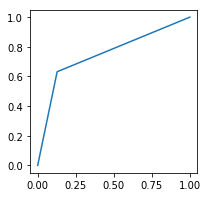

In [29]:
le = preprocessing.LabelEncoder() ;y2 = le.fit_transform(y_pred_tree)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)

#### 3.6 - RANDOM FOREST - " n_estimators " This is the number of trees we want to build before taking the maximum voting or averages of predictions. Higher number of trees gives us better performance but makes our code slower. We should choose as high value as your processor can handle because this makes our predictions stronger and more stable.

In [30]:
# THE COLLECTION OF FITTED SUB-ESTIMATORS IN RANDOM FOREST - LIST OF DECISION TREE CLASSIFER
forest = RandomForestClassifier(n_estimators = 100, random_state = 0) 
forest.fit(xtrain_adultclean, ytrain_adultclean)
y_pred_FOREST = forest.predict(xtest_adultclean)
acc_random_forest1 = round(forest.score(xtrain_adultclean, ytrain_adultclean) * 100, 2)
print ('Training accuracy = {}'.format(acc_random_forest1))
acc_random_forest = round(accuracy_score(ytest_adultclean, y_pred_FOREST) * 100, 2)
print ('Testing accuracy = {}'.format(acc_random_forest))
roc_auc_score(ytest_adultclean,y_pred_FOREST)

Training accuracy = 100.0
Testing accuracy = 86.06


0.778922398560749

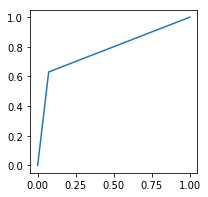

In [31]:
le = preprocessing.LabelEncoder(); y2 = le.fit_transform(y_pred_FOREST)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)

In [32]:
forest = RandomForestClassifier(n_estimators=11, random_state=0)
forest.fit(xtrain_adultclean, ytrain_adultclean)
y_model_est_11 = forest.predict(xtest_adultclean)
print("Accuracy on training set: {:.3f}".format(forest.score(xtrain_adultclean, ytrain_adultclean)))
print("Accuracy on test set: {:.3f}".format(forest.score(xtest_adultclean, ytest_adultclean)))
roc_auc_score(ytest_adultclean,y_model_est_11)

Accuracy on training set: 0.991
Accuracy on test set: 0.848


0.7691647516761886

#### 3.7 - NEURAL NETWORKS

In [33]:
mlp = MLPClassifier(random_state=42) #SET SEED
mlp.fit(xtrain_adultclean, ytrain_adultclean)
y_model_NN = mlp.predict(xtest_adultclean)
print("Accuracy on training set: {:.2f}".format(mlp.score(xtrain_adultclean, ytrain_adultclean)))
print("Accuracy on test set: {:.2f}".format(mlp.score(xtest_adultclean, ytest_adultclean)))
roc_auc_score(ytest_adultclean,y_model_NN)

Accuracy on training set: 0.79
Accuracy on test set: 0.81


0.615187993626884

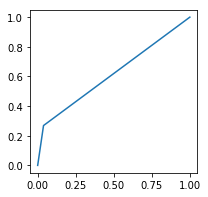

In [34]:
le = preprocessing.LabelEncoder();y2 = le.fit_transform(y_model_NN)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)

####  $Accuracy score (y,yhat)= 1/n_{samples} * \Sigma 1(yihat = yi)$

In [35]:
d=pd.DataFrame({'Name of Model':['Gaussian Naive Bayes','KNN = 1','KNN=7','KNN=11','Logistic Regression','Log Reg C=100','Log Reg C=0.01',
                              'Support Vector Machine','Decision Tree','Decision depth=8','Random Forest','Random Forest_Estimate =11','Neural Networks'],
                'Training Score':[79.2,100,81.55,80.86,79.31,79.3,79.3,96.64,100,85.7,100,99.1,79],
               'Testing Score':[80.28,73.76,79.4,80.52,80.63,80.6,80.6,77.29,81.91,85.7,86.06,84.8,81],
            'ROC Score':[0.62505,0.64921,0.615099,0.61056,0.61162,0.61166,0.6116,0.5321,0.7528,0.74602,0.7789,0.76916,0.61518]});d

,Name of Model,Training Score,Testing Score,ROC Score
0,Gaussian Naive Bayes,79.20,80.28,0.625050
1,KNN = 1,100.00,73.76,0.649210
2,KNN=7,81.55,79.40,0.615099
3,KNN=11,80.86,80.52,0.610560
4,Logistic Regression,79.31,80.63,0.611620
5,Log Reg C=100,79.30,80.60,0.611660
6,Log Reg C=0.01,79.30,80.60,0.611600
7,Support Vector Machine,96.64,77.29,0.532100
8,Decision Tree,100.00,81.91,0.752800
9,Decision depth=8,85.70,85.70,0.746020


#### Out of all these classification techniques / algorithms the Random forest with 86% performs better than other algorithms. in here SVM performs not better. Compared with the Training score we can see that it performs better having lower neighbors in KNN, in default log reg value and default Tree and forest. This makes the idea that when we tune the parameters it does affect the scores. ROC performs better for Random forest also. In this scenario it clearly shows that we can use Random forest classifiation technique for analyzing the data
### END OF DATASET 2-----------------------------------------------------------------------------------------------------------

### DATASET 3 - QUESTION 3  
#### This data set includes 85 predictors that measure demographic characteristics for 5,822 individuals. The response variable is Purchase, which indicates whether or not a given individual purchases a caravan insurance policy. In this data set, only 6 % of people purchased caravan insurance.

In [36]:
caravan_train = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")
caravan_train.head(3)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,No
1,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,No
2,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,No


#### 1.  PREPROCESSING / DATA MINING - A good way to handle this problem is to standardize the data so that all standardize variables are given a mean of zero and a standard deviation of one. Then all variables will be on a comparable scale.  In standardizing the data, we exclude column 86, because that is the qualitative Purchase variable.

In [37]:
caravan_train["Purchase"]=caravan_train["Purchase"].astype('category') # Changing "Y"-Purchase from object type to Category type
caravan_train["Purchase_category"]=caravan_train["Purchase"].cat.codes # Assigned encoders adding new columns
caravanclean=caravan_train.select_dtypes(include=['uint8','int64','int8']).copy() # Here i drop the object type to add int and uint type
x_caravanclean=caravanclean.drop('Purchase_category',axis=1) # TAKING THE PURCHACE AS THE Y VARIABLE OR TARGET
y_caravanclean=caravanclean['Purchase_category'] # CONSIDERING ALL THE VARIABLES TO AS X VARIABLES AT FIRST
print(x_caravanclean.shape) ; print(y_caravanclean.shape) # DROPPING THE SALARY FROM THE X VARIABLES 
xtrain_caravanclean, xtest_caravanclean, ytrain_caravanclean, ytest_caravanclean = train_test_split( 
    x_caravanclean, y_caravanclean, random_state = 1) # SPLITTING THE DATASET INTO 75% 
print(xtrain_caravanclean.shape) ; print(xtest_caravanclean.shape) # PRINTING THE XTRAIN AND XTEST
print(ytrain_caravanclean.shape) ; print(ytest_caravanclean.shape) # PRINTING THE YTRAIN AND YTEST

(4630, 85)
(4630,)
(3472, 85)
(1158, 85)
(3472,)
(1158,)


#### 3. TESTING FOR MODELS 
#### 3.1 GAUSSIAN NAIVE BAYES

In [38]:
modelq3 = GaussianNB()
modelq3.fit(xtrain_caravanclean, ytrain_caravanclean) # MODEL FIT FOR GAUSSIAN
ymodel_GNq3 = modelq3.predict(xtest_caravanclean)
acc_gauss1q3 = round(modelq3.score(xtrain_caravanclean, ytrain_caravanclean) * 100, 2) # ROUNDING THE ACCURACY SCORE
print ('Training accuracy = {}'.format(acc_gauss1q3))# PRINTING THE TRAINING SCORE
acc_gaussq3 = round(accuracy_score(ytest_caravanclean, ymodel_GNq3) * 100, 2)# ROUNDING THE ACCURACY SCORE
print ('Testing accuracy = {}'.format(acc_gaussq3)) # PRINTING THE TESTING SCORE
roc_auc_score(ytest_caravanclean,ymodel_GNq3)

Training accuracy = 11.75
Testing accuracy = 12.35


0.5120599242148731

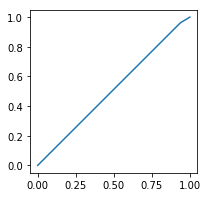

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y1c = le.fit_transform(ytest_caravanclean)
y2 = le.fit_transform(ymodel_GNq3)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1, y2)
plt.plot(fpr, tpr)

#### 3.2 K NEAREST NEIGHBORS - The K range even making it higher the testing and the training accuracy never had chance to join eachother in the plot. This makes the range not useful in this situation.  Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale

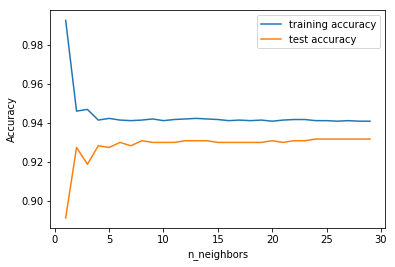

In [40]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 30
neighbors_settings = range(1, 30)
for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(xtrain_caravanclean, ytrain_caravanclean)
    # record training set accuracy
    training_accuracy.append(clf.score(xtrain_caravanclean, ytrain_caravanclean))
    # record generalization accuracy
    test_accuracy.append(clf.score(xtest_caravanclean, ytest_caravanclean))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### It turns out that KNN with K = 1 does far better than random guessing among the customers that are predicted to buy insurance.

In [41]:
modelq3 = KNeighborsClassifier(n_neighbors = 1) # TESTING FOR K=1 NEIGHBORS
modelq3.fit(xtrain_caravanclean, ytrain_caravanclean)
ymodel_k1_q3 = modelq3.predict(xtest_caravanclean)
acc_knn1_q3 = round(modelq3.score(xtrain_caravanclean, ytrain_caravanclean) * 100, 2)
print ('Training accuracy K=1 = {}'.format(acc_knn1_q3))
acc_knn_q3 = round(accuracy_score(ytest_caravanclean, ymodel_k1_q3) * 100, 2)
print ('Testing accuracy K=1= {}'.format(acc_knn_q3))
RocScore=roc_auc_score(ytest_caravanclean, ymodel_k1_q3) ; RocScore# ROC SCORE FOR K=1 NEIGHBOUR

Training accuracy K=1 = 99.28
Testing accuracy K=1= 89.12


0.5427435154444458

In [42]:
modelq3 = KNeighborsClassifier(n_neighbors = 7) # TESTING FOR K=7 NEIGHBORS
modelq3.fit(xtrain_caravanclean, ytrain_caravanclean)
ymodel_k1_q3 = modelq3.predict(xtest_caravanclean)
acc_knn1_q3 = round(modelq3.score(xtrain_caravanclean, ytrain_caravanclean) * 100, 2)
print ('Training accuracy K=1 = {}'.format(acc_knn1_q3))
acc_knn_q3 = round(accuracy_score(ytest_caravanclean, ymodel_k1_q3) * 100, 2)
print ('Testing accuracy K=1= {}'.format(acc_knn_q3))
RocScore=roc_auc_score(ytest_caravanclean, ymodel_k1_q3) ; RocScore# ROC SCORE FOR K=7 NEIGHBOUR

Training accuracy K=1 = 94.12
Testing accuracy K=1= 92.83


0.49814643188137164

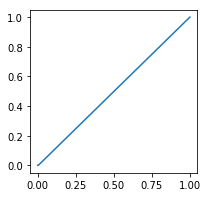

In [44]:
le = preprocessing.LabelEncoder() ; y2 = le.fit_transform(ymodel_k1_q3)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1c, y2)
plt.plot(fpr, tpr)

In [45]:
modelq3 = KNeighborsClassifier(n_neighbors = 11) # TESTING FOR K=11 NEIGHBORS
modelq3.fit(xtrain_caravanclean, ytrain_caravanclean)
ymodel_k1_q3 = modelq3.predict(xtest_caravanclean)
acc_knn1_q3 = round(modelq3.score(xtrain_caravanclean, ytrain_caravanclean) * 100, 2)
print ('Training accuracy K=1 = {}'.format(acc_knn1_q3))
acc_knn_q3 = round(accuracy_score(ytest_caravanclean, ymodel_k1_q3) * 100, 2)
print ('Testing accuracy K=1= {}'.format(acc_knn_q3))
RocScore=roc_auc_score(ytest_caravanclean, ymodel_k1_q3) ; RocScore# ROC SCORE FOR K=11 NEIGHBOUR

Training accuracy K=1 = 94.18
Testing accuracy K=1= 93.01


0.5049389378350794

#### HERE IT SEEMS LIKE THE TESTING SCORES ARE INCREASING AS WE INCREASE THE K NEIGHBORS BUT THE ROC SCORE HAS A VARIED INCREMENT AND DECREMENT RANGE THIS CAN BE BECAUSE OF THE SET SEED OR SOME ERRORS IN THE DATA .
#### 3.3 - LOGISTIC REGRESSION -  As a comparison, I can also fit a logistic regression model to the data. 

In [46]:
logregq3 = LogisticRegression()
logregq3.fit(xtrain_caravanclean, ytrain_caravanclean)
y_pred_log_q3 = logregq3.predict(xtest_caravanclean)
acc_log1q3 = round(logregq3.score(xtrain_caravanclean, ytrain_caravanclean) * 100, 2)
print ('Training accuracy = {}'.format(acc_log1q3))
acc_logq3 = round(accuracy_score(ytest_caravanclean, y_pred_log_q3) * 100, 2)
print ('Testing accuracy = {}'.format(acc_logq3))
roc_auc_score(ytest_caravanclean, y_pred_log_q3)

Training accuracy = 94.15
Testing accuracy = 92.92


0.4986098239110287

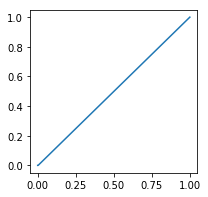

In [47]:
le = preprocessing.LabelEncoder(); y2 = le.fit_transform(y_pred_log_q3)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1c, y2)
plt.plot(fpr, tpr)

In [48]:
logreg100q3 = LogisticRegression(C=100).fit(xtrain_caravanclean, ytrain_caravanclean)
y_model_log_q3 = logregq3.predict(xtest_caravanclean)
print("Training set score: {:.3f}".format(logreg100q3.score(xtrain_caravanclean, ytrain_caravanclean)))
print("Test set score: {:.3f}".format(logreg100q3.score(xtest_caravanclean, ytest_caravanclean)))
roc_auc_score(ytest_caravanclean, y_model_log_q3)

Training set score: 0.941
Test set score: 0.926


0.4986098239110287

In [49]:
logreg001q3 = LogisticRegression(C=0.5).fit(xtrain_caravanclean, ytrain_caravanclean)
y_model_log_q3 = logregq3.predict(xtest_caravanclean)
print("Training set score: {:.3f}".format(logreg001q3.score(xtrain_caravanclean, ytrain_caravanclean)))
print("Test set score: {:.3f}".format(logreg001q3.score(xtest_caravanclean, ytest_caravanclean)))
roc_auc_score(ytest_caravanclean, y_model_log_q3)

Training set score: 0.942
Test set score: 0.929


0.4986098239110287

#### 3.4 - SUPPORT VECTOR MACHINES 

In [50]:
svc = SVC()
svc.fit(xtrain_caravanclean, ytrain_caravanclean)
y_pred_SVC_q3 = svc.predict(xtest_caravanclean)
acc_svc1q3 = round(svc.score(xtrain_caravanclean, ytrain_caravanclean) * 100, 2)
print ('Training accuracy = {}'.format(acc_svc1q3))
acc_svcq3 = round(accuracy_score(ytest_caravanclean, y_pred_SVC_q3) * 100, 2)
print ('Testing accuracy = {}'.format(acc_svcq3))
roc_auc_score(ytest_caravanclean,y_pred_SVC_q3)

Training accuracy = 94.27
Testing accuracy = 93.09


0.4995366079703429

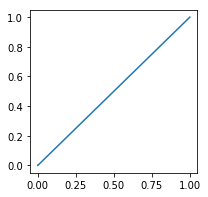

In [51]:
le = preprocessing.LabelEncoder(); y2 = le.fit_transform(y_pred_SVC_q3)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1c, y2)
plt.plot(fpr, tpr)

#### 3.5 - DECISSION TREE CLASSIFIER

Accuracy on training set: 0.966
Accuracy on test set: 0.915


0.531792212667613

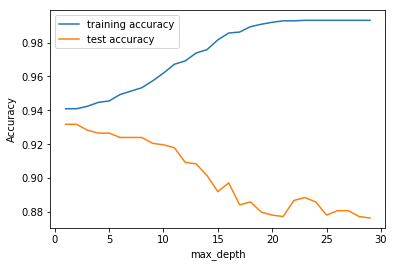

In [52]:
training_accuracy = []
test_accuracy = []
# try max_depth from 1 to 30
max_depth_settings = range(1, 30)
for max_depth in max_depth_settings:
    # build the model
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(xtrain_caravanclean, ytrain_caravanclean)
    # record training set accuracy
    training_accuracy.append(clf.score(xtrain_caravanclean, ytrain_caravanclean))
    # record generalization accuracy
    test_accuracy.append(clf.score(xtest_caravanclean, ytest_caravanclean))
plt.plot(max_depth_settings, training_accuracy, label="training accuracy")
plt.plot(max_depth_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("max_depth")
plt.legend()
tree = DecisionTreeClassifier(max_depth=11, random_state=0)
tree.fit(xtrain_caravanclean, ytrain_caravanclean)
y_model_tree_q3 = tree.predict(xtest_caravanclean)
print("Accuracy on training set: {:.3f}".format(tree.score(xtrain_caravanclean, ytrain_caravanclean)))
print("Accuracy on test set: {:.3f}".format(tree.score(xtest_caravanclean, ytest_caravanclean)))
roc_auc_score(ytest_caravanclean,y_model_tree_q3)

In [53]:
# DECISION TREE ACCURACY AND ROC CURVE BASED ON NORMAL BASIS WITHOUT MENTINING THE MAX_DEPTH
decision_tree = DecisionTreeClassifier()
decision_tree.fit(xtrain_caravanclean, ytrain_caravanclean)
y_pred_treeq3 = decision_tree.predict(xtest_caravanclean)
acc_decision_tree1_q3 = round(decision_tree.score(xtrain_caravanclean, ytrain_caravanclean) * 100, 2)
print ('Training accuracy = {}'.format(acc_decision_tree1_q3))
acc_decision_tree_q3 = round(accuracy_score(ytest_caravanclean, y_pred_treeq3) * 100, 2)
print ('Testing accuracy = {}'.format(acc_decision_tree_q3))
roc_auc_score(ytest_caravanclean,y_pred_treeq3)

Training accuracy = 99.31
Testing accuracy = 88.51


0.5101711617648784

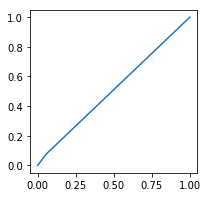

In [54]:
le = preprocessing.LabelEncoder() ;y2 = le.fit_transform(y_pred_treeq3)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1c, y2)
plt.plot(fpr, tpr)

#### HERE THE TRAINING ACCURACY SCORE IS HIGHER FOR HAVING MAXIMUM DEPTH 1 IN DECISSION TREE AND THE TESTING ACCURACY IS LOWER IN MAXDEPTH WITH 10 AND HIGHER AT MAX 1. THIS IS JUST VISEVERSA. BUT THE ROC SCORE DECREASES AS WE DECREASE THE MAX DEPTH.

#### 3.6 - RANDOM FOREST

In [55]:
forest = RandomForestClassifier(n_estimators = 100, random_state = 0)
forest.fit(xtrain_caravanclean, ytrain_caravanclean)
y_pred_FOREST_q3 = forest.predict(xtest_caravanclean)
acc_random_forest1_q3 = round(forest.score(xtrain_caravanclean, ytrain_caravanclean) * 100, 2)
print ('Training accuracy = {}'.format(acc_random_forest1_q3))
acc_random_forest_q3 = round(accuracy_score(ytest_caravanclean, y_pred_FOREST_q3) * 100, 2)
print ('Testing accuracy = {}'.format(acc_random_forest_q3))
roc_auc_score(ytest_caravanclean,y_pred_FOREST_q3)

Training accuracy = 99.31
Testing accuracy = 92.06


0.5115730692976385

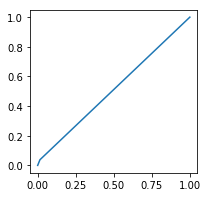

In [56]:
le = preprocessing.LabelEncoder() ; y2 = le.fit_transform(y_pred_FOREST_q3)
from sklearn import metrics
plt.figure(figsize = (3,3))
fpr, tpr, thresholds = metrics.roc_curve(y1c, y2)
plt.plot(fpr, tpr)

In [57]:
forest = RandomForestClassifier(n_estimators=30, random_state=0)
forest.fit(xtrain_caravanclean, ytrain_caravanclean)
y_model_est_30 = forest.predict(xtest_caravanclean)
print("Accuracy on training set: {:.3f}".format(forest.score(xtrain_caravanclean, ytrain_caravanclean)))
print("Accuracy on test set: {:.3f}".format(forest.score(xtest_caravanclean, ytest_caravanclean)))
roc_auc_score(ytest_caravanclean,y_model_est_30)

Accuracy on training set: 0.992
Accuracy on test set: 0.921


0.5115730692976385

##### HERE IN RANDOM FOREST - THE TRAINING ACCURACY IS HIGHER AT ESTIMATOR 100 WHEREAS THE EATIMATOR 30 HAS MORE HIGHER THAN THE 100. THE ROC SCORE IS SIMILAR IN BOTH THE ESTIMATORS
#### 3.7 - NEURAL NETWORKS

In [58]:
mlp = MLPClassifier(random_state=56)
mlp.fit(xtrain_caravanclean, ytrain_caravanclean)
y_model_NN_q3 = mlp.predict(xtest_caravanclean)
print("Accuracy on training set: {:.2f}".format(mlp.score(xtrain_caravanclean, ytrain_caravanclean)))
print("Accuracy on test set: {:.2f}".format(mlp.score(xtest_caravanclean, ytest_caravanclean)))
roc_auc_score(ytest_caravanclean,y_model_NN_q3)

Accuracy on training set: 0.95
Accuracy on test set: 0.92


0.49891484144953724

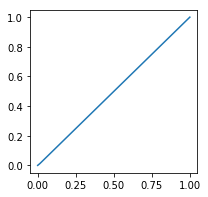

In [59]:
le = preprocessing.LabelEncoder() ; y2 = le.fit_transform(y_model_NN_q3)
from sklearn import metrics
plt.figure(figsize = (3, 3))
fpr, tpr, thresholds = metrics.roc_curve(y1c, y2)
plt.plot(fpr, tpr)

In [60]:
q3=pd.DataFrame({'Name of Model':['Gaussian Naive Bayes','KNN = 1','KNN=7','KNN=11','Logistic Regression','Log Reg C=100','Log Reg C=0.01',
                              'Support Vector Machine','Decision Tree','Decision depth=8','Random Forest','Random Forest_Estimate =11','Neural Networks'],
                'Training Score':[11.75,99.28,94.12,94.18,94.15,94.1,94.1,94.27,96.6,99.31,99.31,99.2,95],
               'Testing Score':[12.35,89.12,92.83,93.01,92.92,92.6,93.2,93.09,91.5,88.26,92.06,92.1,92],
               'ROC Score':[0.51205,0.5427,0.49814,0.50493,0.4986,0.4986,0.4986,0.4995,0.5310,0.51464,0.5115,0.5115,0.4989]}) ;q3

,Name of Model,Training Score,Testing Score,ROC Score
0,Gaussian Naive Bayes,11.75,12.35,0.51205
1,KNN = 1,99.28,89.12,0.54270
2,KNN=7,94.12,92.83,0.49814
3,KNN=11,94.18,93.01,0.50493
4,Logistic Regression,94.15,92.92,0.49860
5,Log Reg C=100,94.10,92.60,0.49860
6,Log Reg C=0.01,94.10,93.20,0.49860
7,Support Vector Machine,94.27,93.09,0.49950
8,Decision Tree,96.60,91.50,0.53100
9,Decision depth=8,99.31,88.26,0.51464


#### As per the results above in the table though we have random forest having better training results with random forest it does not cope up much when it comes to testing score. The logistic regression with testing score higher makes much more sence having 92.92% which also proves that having a "Y" traget variable in binary its better to use logistic to analyze. 

### QUESTION 3 - PART 2

In [61]:
Caravan_unk = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")
from IPython.display import display, Math, Latex

#### THE LOGISTIC MODEL SHOULD BE USED TO FIND THE RELATIONSHIP BETWEEN  $p(X)=Pr(Y=1|X)$ and X. If we use this approach to predict the default=yes using balance, then we obtain the model as shown $P(X)=(\beta)0 + (\beta)1X$ . Based on a direct marketing problem, the goal is to  and  caravan insurance policy ownership on the basis of product usage and sociodemographic data supplied about the customer. Considering all the prediction models for the prediction task, suppose the supervisor has limited time and resources to only 50 customers then we will have to use the logistic regression. This problem is not uniqe to the default data. Any time a straight line is fit to the binary response that is coded as "0" or "1" in principle we can always predict  $p(X)<0$ for some values of X and $p(X)>1$ for other unless the range of X is limited.
#### To avoid this problem we must model $p(X)$ using a function that gives outputs between "0" and "1" for all values of X. Many functions meet this discriptions. But logistic seems better.
$p(X)=e^{\beta0+\beta1X}/1+e^{\beta0+\beta1X}$
#### To fit this model we have to use maximum likelihood. The logistic function will always produce an S-shaped curve of this form, and so regardless of the value of X we should obtain a sensible prediction. 

### MOREOVER THE LOGISTIC MODEL IS BETTER ABLE TO CAPTURE THE RANGE OF PROBABILITIES THAN IN THE LINEAR REGRESSION MODEL. 

In [62]:
predictlog=logregq3.predict_proba(Caravan_unk)[:,1] #Predicting log regression for the data
predictlog=pd.DataFrame(predictlog) #Having the predicted value in a datframe 
predictlog.columns=predictlog.columns+1 # Adding the dataframe to the actual dataframe
predictlog.index=predictlog.index
logdone=pd.merge(Caravan_unk,predictlog,left_index=True, right_index=True) # Merging dataframe 
logdone.head(3)

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,1
0,41,1,3,3,10,0,7,0,3,8,...,0,0,0,1,0,1,0,0,0,0.086603
1,38,1,3,2,9,0,6,0,3,5,...,0,0,0,0,0,0,0,0,0,0.008283
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,1,0,0,0,0,0,0.405447


### To find top 50 customers reporting just the row numbers of your selected 50 customers as they appear in the Caravan_unk file in increasing order

In [63]:
import pandas as pd
sort_logpredict=logdone.sort_values(by=[1],ascending=False)
sort_logpredict_probability=sort_logpredict[1]
sort_logpredict_probability.head(n=50)

30      0.907713
557     0.649908
738     0.595084
651     0.470475
868     0.414811
2       0.405447
389     0.381698
267     0.372276
693     0.370509
739     0.353876
439     0.342413
156     0.324681
852     0.321649
471     0.321312
31      0.319020
29      0.312956
482     0.306519
423     0.287660
414     0.285035
41      0.284050
56      0.283109
217     0.277880
1059    0.277520
420     0.272574
403     0.272328
639     0.264019
579     0.257454
630     0.254560
1004    0.249724
257     0.249338
319     0.247586
920     0.247074
32      0.244093
20      0.243860
754     0.239952
681     0.238739
1045    0.238720
164     0.236995
26      0.232997
11      0.232997
836     0.228321
457     0.228013
201     0.227188
703     0.226044
518     0.224978
19      0.224227
849     0.223438
487     0.218005
12      0.217704
644     0.217160
Name: 1, dtype: float64

### END OF DATASET 3------------------------------------ END OF PROJECT -------------------------------------------------------